IndexError: list index out of range

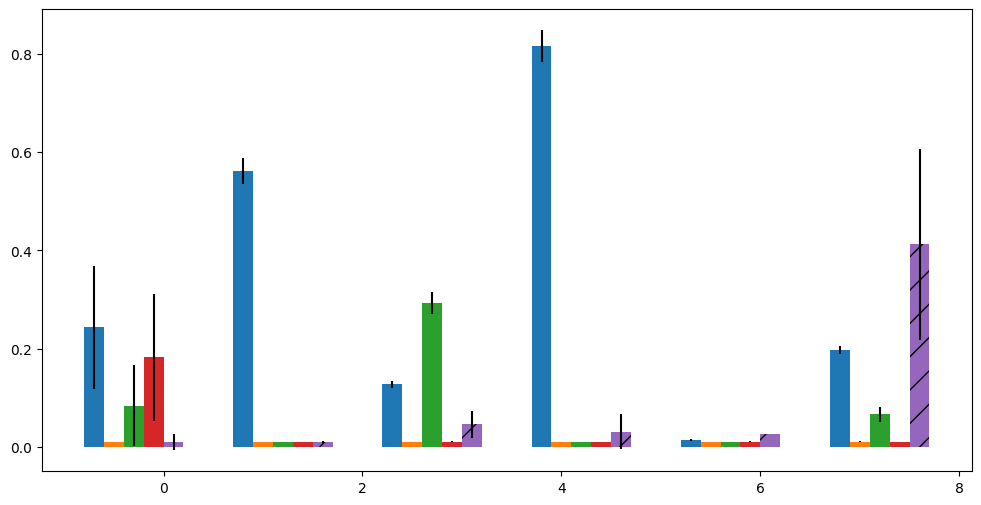

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
# Sample data
# categories = ['IHDP','TCGA','IHDP-C','News', 'EEEC\n(Gender)', 'EEEC\n(Race)','Uganda']
categories = ['IHDP','TCGA','IHDP-C','News', 'EEEC','Uganda']
# categories = ['Category A', 'Category B', 'Category C']
# dt
dt_values = [0.243,0.562,0.127, 0.816, 0.013,0.198]
dt_std = [0.126,0.026,0.008, 0.032, 0.002,0.008]

# lore
lore_values=[0.000, 0.000, 0.000, 0.000, 0.000, 0.000]
lore_std=[0.000, 0.000, 0.000, 0.000, 0.000,0.001]

# anchor
anchor_values=[0.084, 0.000,0.293,0.000,0.000,0.066]
anchor_std=[0.083,0.000, 0.022, 0.000,0.000, 0.015]

# lime
lime_values=[0.182, 0.000, 0.001, 0.000, 0.000, 0.000]
lime_std=[0.129, 0.000, 0.001, 0.000, 0.001,0.000]

# Shapley
shap_values=[0.009,0.005,0.046,0.031,0.027,0.412]
shap_std=[0.017,0.002,0.027,0.035,0.000,0.195]

# discrete
discrete_values=[1.0,1.0,1.0,1.0,1.0,1.0]
discrete_std = [0.0,0.0,0.0,0.0,0.0,0.0]

#Nam
nam_values=[0.343,0.120,0.045,0.493, -1, 0.082]
nam_std=[0.065,0.002,0.006,0.110,  -1 ,0.018]

# enrl
enrl_values = [0.134,0.231, 0.053, 0.002,-1, 0.102]
enrl_std = [0.002,0.043,0.002,0.000,-1, 0.032]


# # dt
# dt_values = [0.243,0.562,0.127, 0.816,0.004, 0.013,0.198]
# dt_std = [0.126,0.026,0.008, 0.032, 0.001, 0.002,0.008]

# # lore
# lore_values=[0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000]
# lore_std=[0.000, 0.000, 0.000, 0.000, 0.000,0.000,0.001]

# # anchor
# anchor_values=[0.084, 0.000,0.293,0.000,0.000,0.000,0.066]
# anchor_std=[0.083,0.000, 0.022, 0.000,0.000,0.000, 0.015]

# # lime
# lime_values=[0.182, 0.000, 0.001, 0.000, 0.000, 0.000, 0.000]
# lime_std=[0.129, 0.000, 0.001, 0.000, 0.000,0.001,0.000]

# # Shapley
# shap_values=[0.009,0.005,0.046,0.031,0.034,0.027,0.412]
# shap_std=[0.017,0.002,0.027,0.035,0.003,0.000,0.195]

# # discrete
# discrete_values=[1.0,1.0,1.0,1.0,1.0,1.0,1.0]
# discrete_std = [0.0,0.0,0.0,0.0,0.0,0.0,0.0]

# #Nam
# nam_values=[0.343,0.120,0.045,0.493, -1, -1, 0.082]
# nam_std=[0.065,0.002,0.006,0.110, -1, -1 ,0.018]

# # enrl
# enrl_values = [0.134,0.231, 0.053, 0.002,-1,-1, 0.102]
# enrl_std = [0.002,0.043,0.002,0.000,-1,-1, 0.032]

# # shap
# shap_values =[0.009±0.017 0.005±0.002 0.046±0.027 0.031±0.035 0.034±0.003 0.027± 0.000 0.412±0.195]

# group2_values = [12, 9, 11]

# Define the bar width
bar_width = 0.2
group_spacing = 0.3
# Create an array of x-axis positions for the bars
x = np.arange(len(categories))*1.5

# Create the figure and axis objects
# fig, ax = plt.subplots()

# Create the grouped bar plot
num_bars = 5

fig, ax = plt.subplots(figsize=(12, 6))

values=[dt_values,lore_values,anchor_values,lime_values,shap_values,nam_values,enrl_values, discrete_values]
errors=[dt_std,lore_std,anchor_std,lime_std, shap_std, nam_std, enrl_std, discrete_std]
group_labels=['Model distillation','Lore','Anchor','Lime','Shapley', 'NAM','ENRL','DISCRET']
values_array = np.array(values)
errors_array = np.array(errors) 
# values=[lime_values,discrete_values, discrete_values]
# group_labels=['Lime','Discrete', 'discrete_values']

# group_offset = 0.1
num_bars = len(values)

hatch_patterns = ['','','','','/']

min_val = 0.01

for i in range(num_bars):
    bar_positions = x + i * bar_width - (num_bars - 1) * bar_width / 2
    curr_values = np.array(values[i])
    curr_values = (curr_values < min_val)*min_val + (curr_values >= min_val)*curr_values
    curr_errors = np.array(errors[i])
    curr_errors = (curr_values < min_val/2)*min_val/2 + (curr_values >= min_val/2)*curr_errors
    ax.bar(bar_positions, curr_values.tolist(), bar_width, label=group_labels[i],hatch=hatch_patterns[i], yerr=errors[i])

# bar1 = ax.bar(x - bar_width/2, dt_values, bar_width, label='Decisition tree')
# bar2 = ax.bar(x + bar_width/2, lore_values, bar_width, label='Lore')
# bar3 = ax.bar(x - bar_width/2, anchor_values, bar_width, label='Anchor')
# bar4 = ax.bar(x + bar_width/2, lime_values, bar_width, label='Lime')
# bar5 = ax.bar(x + bar_width/2, discrete_values, bar_width, label='Discrete')


# Set labels, title, and legend
# ax.set_xlabel('Dataset', fontsize=14, fontweight='bold')
ax.set_ylabel('Consistency Score', fontsize=14, fontweight='bold')
# ax.set_title('Grouped Bar Plot')
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12, fontweight='bold')

tickles =["{:.2f}".format(float(num)) for num in ax.get_yticks()]

ax.set_yticklabels(tickles, fontsize=12, fontweight='bold')
ax.legend(fontsize=16, prop={'weight': 'bold'}, loc='upper right', bbox_to_anchor=(1.2, 1))
decimal_places = 2  # Change this value to set the desired number of decimal places
# ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(f'{{:.{decimal_places}f}}'))


# print(ax.get_yticks())
# Show the plot
plt.show()

In [3]:
all_categories = []
all_group_labels = []
for g in group_labels:
    for category in categories:
    
        # print(g, category)
        all_group_labels.append(g)
        all_categories.append(category)

48 48 (48,) (48,)


/tmp/ipykernel_1590338/55094608.py:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(x="Category", y="Values", hue="Group", data=df, palette="muted", ci="sd")


56
{'Model distillation': '', 'Lore': '', 'Anchor': '', 'Lime': '', 'Shapley': '', 'NAM': '////', 'ENRL': '////', 'DISCRET': ''}


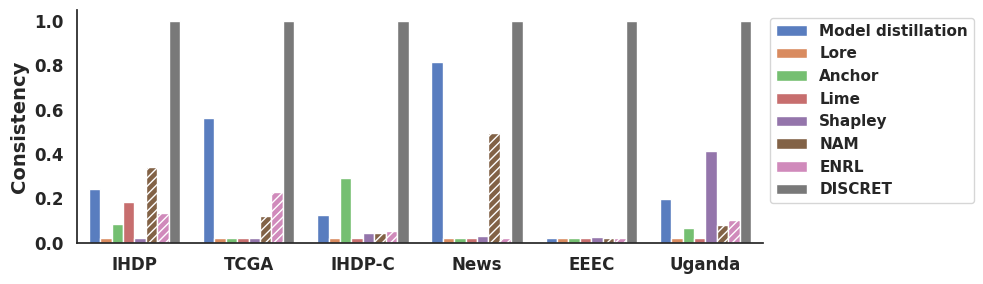

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data
# data = {
#     'Category': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
#     'Group': ['Group 1', 'Group 2', 'Group 3', 'Group 1', 'Group 2', 'Group 3', 'Group 1', 'Group 2', 'Group 3'],
#     'Values': [10.123, 15.456, 7.789, 12.345, 9.678, 11.234, 8.456, 13.789, 6.123],
#     'Errors': [0.5, 0.3, 0.4, 0.4, 0.2, 0.3, 0.3, 0.5, 0.2]
# }


data = {
    'Category': ['IHDP','TCGA','IHDP-C','News', 'EEEC','Uganda'],
    'Group': ['Group 1', 'Group 2', 'Group 3', 'Group 1', 'Group 2', 'Group 3', 'Group 1', 'Group 2', 'Group 3'],
    'Values': [10.123, 15.456, 7.789, 12.345, 9.678, 11.234, 8.456, 13.789, 6.123],
    'Errors': [0.5, 0.3, 0.4, 0.4, 0.2, 0.3, 0.3, 0.5, 0.2]
}


# values=[dt_values,lore_values,anchor_values,lime_values,discrete_values]
# errors=[dt_std,lore_std,anchor_std,lime_std,discrete_std]
values=[dt_values,lore_values,anchor_values,lime_values,shap_values,nam_values,enrl_values, discrete_values]
errors=[dt_std,lore_std,anchor_std,lime_std, shap_std, nam_std, enrl_std, discrete_std]
min_val = 0.02
values = np.array(values).reshape(-1)
errors = np.array(errors).reshape(-1)
values[values < min_val] = min_val
errors[values < min_val/2] = min_val/2

print(len(all_categories), len(all_group_labels), values.shape, errors.shape)

data = {
    'Category': all_categories,
    'Group': all_group_labels,
    'Values': values,
    'Errors': errors
}



df = pd.DataFrame(data)

# Set seaborn style
sns.set(style="white")

# Create a grouped bar plot with error bars using Seaborn
plt.figure(figsize=(10, 3))
ax = sns.barplot(x="Category", y="Values", hue="Group", data=df, palette="muted", ci="sd")

# Set the width of hatch lines
hatch_width = 2  # Adjust this value to increase/decrease the hatch line width
print(len(ax.patches))

hatch_patterns = {}

for g in group_labels:
    if g == "Discrete" or g == "NAM" or g == "ENRL":
        hatch_patterns[g] = '////'
    else:
        hatch_patterns[g] = ''
        
print(hatch_patterns)
# for bar in ax.patches:
#     bar.set_hatch('/' * hatch_width)  # Use '/' as the hatch pattern and adjust the width

for bar, hatch in zip(ax.patches, df['Group'].map(hatch_patterns)):
    bar.set_hatch(hatch)

# Set labels, title, and legend
plt.xlabel('', fontsize=14, fontweight='bold')
plt.ylabel('Consistency', fontsize=14, fontweight='bold')
# plt.title('Grouped Bar Plot with Error Bars and Custom Hatch Width', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Customize legend outside the figure
legend = plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12, title_fontsize=12, prop={'weight': 'bold'})
legend.get_title().set_fontweight('bold')

# Show the plot
sns.despine(ax=ax, left=False, right=True, top=True, bottom=False)
plt.tight_layout()
# plt.show()
plt.savefig('consistency.svg', dpi=300, bbox_inches='tight')